# Custom filters Pipeline

Pipeline to apply and modify the following filters to the fragment library:
    * Pre-filters (not optional)
    * PAINS filter
    * Brenk filter
    * Rule of Three filter
    * Quantitative Estimate of Druglikeness (QED) filter
    * Buyable Building Block filter
    * SYnthetic Bayesian Accessibility (SYBA) filter
    * Pairwise Retrosynthesizability

## Table of Contents
1. Load fragment library
2. Apply pre-filters
3. Define custom filters parameters
* 3.1. PAINS
* 3.2. Brenk
* 3.3. Rule of Three
* 3.4. QED
* 3.5. Buyable Building Blocks
* 3.6. SYBA
* 3.7. Pairwise Retrosynthesizability
* 3.8. General parameter
4. Apply filters with chosen parameters

In [1]:
from pathlib import Path

import pandas as pd
from rdkit.Chem import PandasTools

from kinfraglib import utils, filters

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

## Globals

In [4]:
# Path to data
HERE = Path().resolve()
PATH_DATA = HERE / "../../data"

## 1. Load fragment library

In [5]:
fragment_library_original = utils.read_fragment_library(PATH_DATA / "fragment_library")

In [6]:
fragment_library_original.keys()

dict_keys(['AP', 'FP', 'SE', 'GA', 'B1', 'B2', 'X'])

In [7]:
pd.concat(fragment_library_original).reset_index(drop=True).shape

(7486, 15)

## 2. Apply pre-filters
Pre-filters are
- removing fragments in pool X
- removing duplicates
- removing fragments without dummy atoms (unfragmented ligands)
- removing fragments only connecting to pool X

In [8]:
fragment_library = filters.prefilters.pre_filters(fragment_library_original)

## 3. Define custom filters parameters

The following cells define the parameters for the custom filters. You can modify them according to your needs.
If you want to have a closer look on the functionality of the single filters please check out the following notebooks:
*link to nb 1_1: notebook applying the unwanted substructure filters (PAINS and Brenk)
*link to nb 1_2: notebook applying the drug likeness filters (Ro3 and QED)
*link to nb 1_3: notebook applying the synthesizability filters (buyable building blocks and SYBA)
*link to nb 1_4: notebook applying pairwise retrosynthesizability 

### 3.1. PAINS parameters
Defining whether the fragment library should be filtered for PAINS structures.

In [9]:
pains_parameters = {
    'pains_filter' : True,     # define if the fragments should be filtered for PAINS structures
}
pains_parameters

{'pains_filter': True}

### 3.2. Brenk et al. parameters
Defining whether the fragment library should be filtered for unwanted substructures defined by Brenk et al.
If you want to use other structures instead this is possible if you provide a "unwanted_substructures.csv"-file with the same structure as the provided one (name and smarts columns seperated by a space). If you do so please specify the path where your unwanted_substructure.csv file is stored.

In [10]:
brenk_parameters = {
    'brenk_filter' : True,     # define if the fragments should be filtered for Brenk et al. unwanted substructures
    'substructure_file' : HERE / "../../data/filters/Brenk",     # define where the unwanted substructures file is stored
}
brenk_parameters

{'brenk_filter': True,
 'substructure_file': PosixPath('/home/nona/masterthesis/KinFragLib/notebooks/custom_kinfraglib/../../data/filters/Brenk')}

### 3.3. Rule of Three parameters
Defining if the Rule of Three should be applied and how many of the parameters need to be fulfilled.

In [11]:
ro3_parameters = {
    'ro3_filter' : True,     # define if the fragments should be filtered by the Rule of Three
    'min_fulfilled' : 6,     # define how many parameters of the rule of three should be fulfilled
    'cutoff_crit': ">="      # define if the number of fulfilled paramateters should be >=, >, <, == or <= than min_fulfilled
}
ro3_parameters

{'ro3_filter': True, 'min_fulfilled': 6, 'cutoff_crit': '>='}

### 3.4. QED paramaters
Define whether the fragments should be fltered by the QED and which cutoff value is defined. 

To define the cutoff value check: [Bickerton, Richard & Paolini, Gaia & Besnard, Jérémy & Muresan, Sorel & Hopkins, Andrew. (2012). Quantifying the chemical beauty of drugs. Nature chemistry. 4. 90-8. 10.1038/nchem.1243.](10.1038/nchem.1243)

In [12]:
qed_parameters = {
    'qed_filter' : True,     # define whether the fragments should be filtered by the QED
    'cutoff_value' : 0.42,    # define a cutoff value between 0 and 1. For orientation check the original QED publication
    'cutoff_crit' : ">",     # define whether the QED should be ">", "<", ">=", "<=" or "==" compared to the cutoff value
    'do_plot' : True,     # define whether plots should be displayed
    'plot_stats' : True,     # define whether statistics are shown inside the plots
}
qed_parameters

{'qed_filter': True,
 'cutoff_value': 0.42,
 'cutoff_crit': '>',
 'do_plot': True,
 'plot_stats': True}

### 3.5. Buyable Building Blocks parameters
Define whether the fragments should be filtered by comparison with building blocks.
To manipulate the building block file check the [mardown file](https://github.com/sonjaleo/KinFragLib/blob/review-update/data/filters/DataWarrior/README.md) describing how it is created.

In [13]:
bb_parameters = {
    'bb_filter' : True,     # define whether the fragments should be filtered by comparison with building blocks
    'bb_file' : str(str(PATH_DATA) + "/filters/DataWarrior/Enamine_Building_Blocks.sdf"),    # path to file containing building blocks. For creating or changing the building block file check the description above.
}
bb_parameters

{'bb_filter': True,
 'bb_file': '/home/nona/masterthesis/KinFragLib/notebooks/custom_kinfraglib/../../data/filters/DataWarrior/Enamine_Building_Blocks.sdf'}

### 3.6. SYBA parameters

In [14]:
syba_parameters = {
    'syba_filter' : True,     # define if the fragment library should be filtered by the SYBA score
    'cutoff_value' : 0,     # defining the cutoff value for the SYBA score
    'cutoff_crit' : ">",     # defining how the SYBA score should be compared to the cutoff to be accepted
    'query_type' : "mol",     # defining is the SYBA score is calculated for the molecule ("mol") or for the smiles string ("smiles") of the fragment
    'do_plot' : True,     # define whether plots should be displayed
    'plot_stats' : True,     # define whether statistics are shown inside the plots
}
syba_parameters

{'syba_filter': True,
 'cutoff_value': 0,
 'cutoff_crit': '>',
 'query_type': 'mol',
 'do_plot': True,
 'plot_stats': True}

### 3.7. Pairwise Retrosynthesizability

⚠ Note: ⚠ This function might run a long time if you accepted more/other fragments in the previous filter steps than with the default settings.

In [15]:
retro_parameters = {
    'retro_filter' : True,     # define whether the pairwise retrosynthesizability filter should be applied or not 
    'cutoff_value' : 10,     # define in how many retrosynthetic routes a fragment needs to participate to get accepted
    'cutoff_crit' : ">=",     # define if the number of participations needs to be ">", "<", "==", ">=" or "<=" compared to the cutoff value
}
retro_parameters

{'retro_filter': True, 'cutoff_value': 10, 'cutoff_crit': '>='}

### 3.8. General Parameter

In [16]:
general_parameters = {
    'show_stats' : True,     # define if a dataframe per filter with the number of accepted/rejected fragments is printed
}
general_parameters

{'show_stats': True}

## 4. Apply filters with chosen parameters

Run the following cell to start the pipeline.

Apply PAINS filter..


,pre_filtered,accepted_pains,rejected_pains
subpocket,,,
AP,1001,990,11
FP,864,847,17
SE,607,599,8
GA,306,300,6
B1,42,42,0
B2,42,42,0


Apply Brenk filter..
Number of unwanted substructures in Brenk et al. collection: 104


,pre_filtered,accepted_brenk,rejected_brenk
subpocket,,,
AP,1001,782,219
FP,864,707,157
SE,607,497,110
GA,306,196,110
B1,42,26,16
B2,42,36,6


Apply Ro3 filter..


,pre_filtered,accepted_ro3,rejected_ro3
subpocket,,,
AP,1001,516,485
FP,864,655,209
SE,607,501,106
GA,306,278,28
B1,42,39,3
B2,42,40,2


Apply QED filter..


,pre_filtered,accepted_qed,rejected_qed
subpocket,,,
AP,1001,974,27
FP,864,749,115
SE,607,548,59
GA,306,271,35
B1,42,37,5
B2,42,39,3


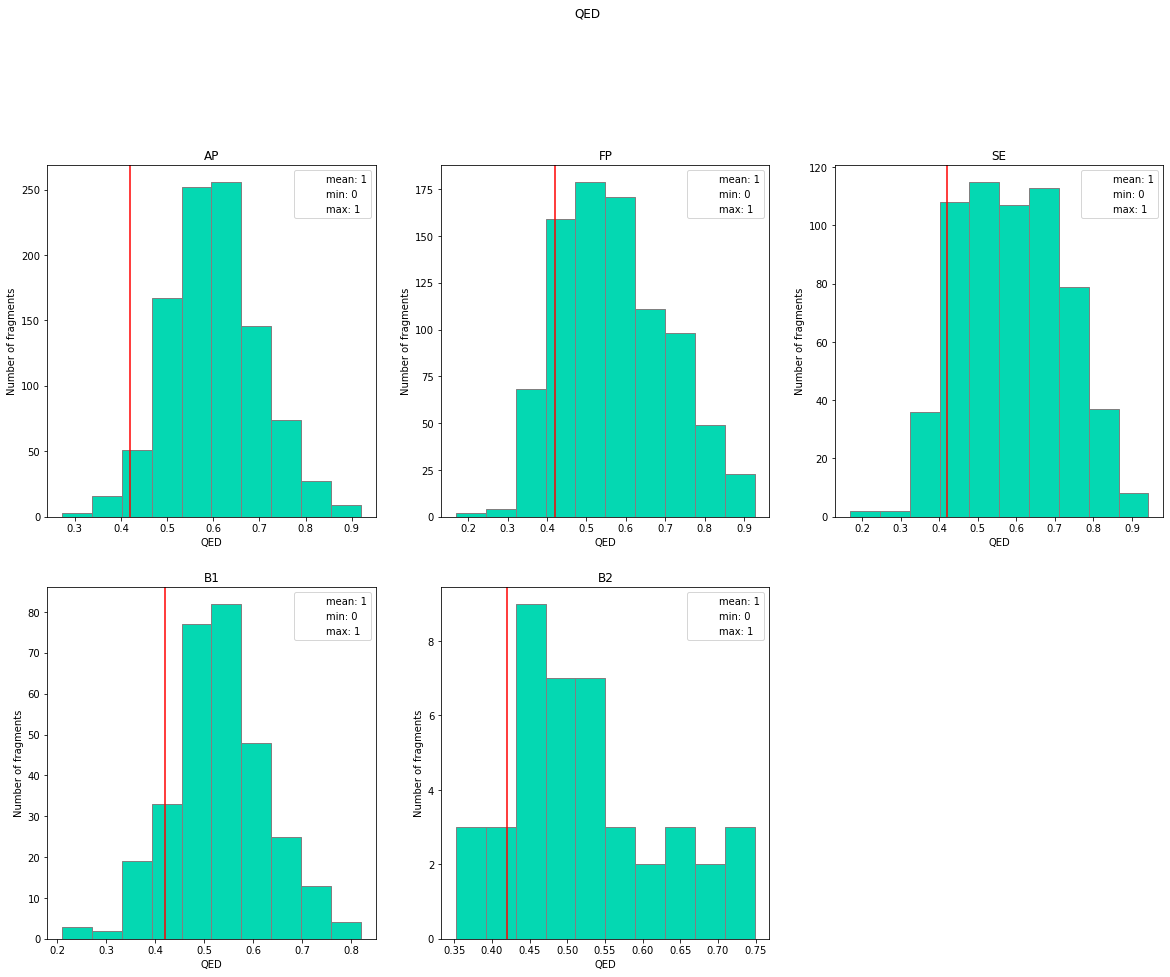

Apply BB filter..


,pre_filtered,accepted_enamine,rejected_enamine
subpocket,,,
AP,1001,346,655
FP,864,414,450
SE,607,332,275
GA,306,244,62
B1,42,38,4
B2,42,39,3


Apply SYBA filter..


,pre_filtered,accepted_syba,rejected_syba
subpocket,,,
AP,1001,898,103
FP,864,689,175
SE,607,551,56
GA,306,280,26
B1,42,32,10
B2,42,39,3


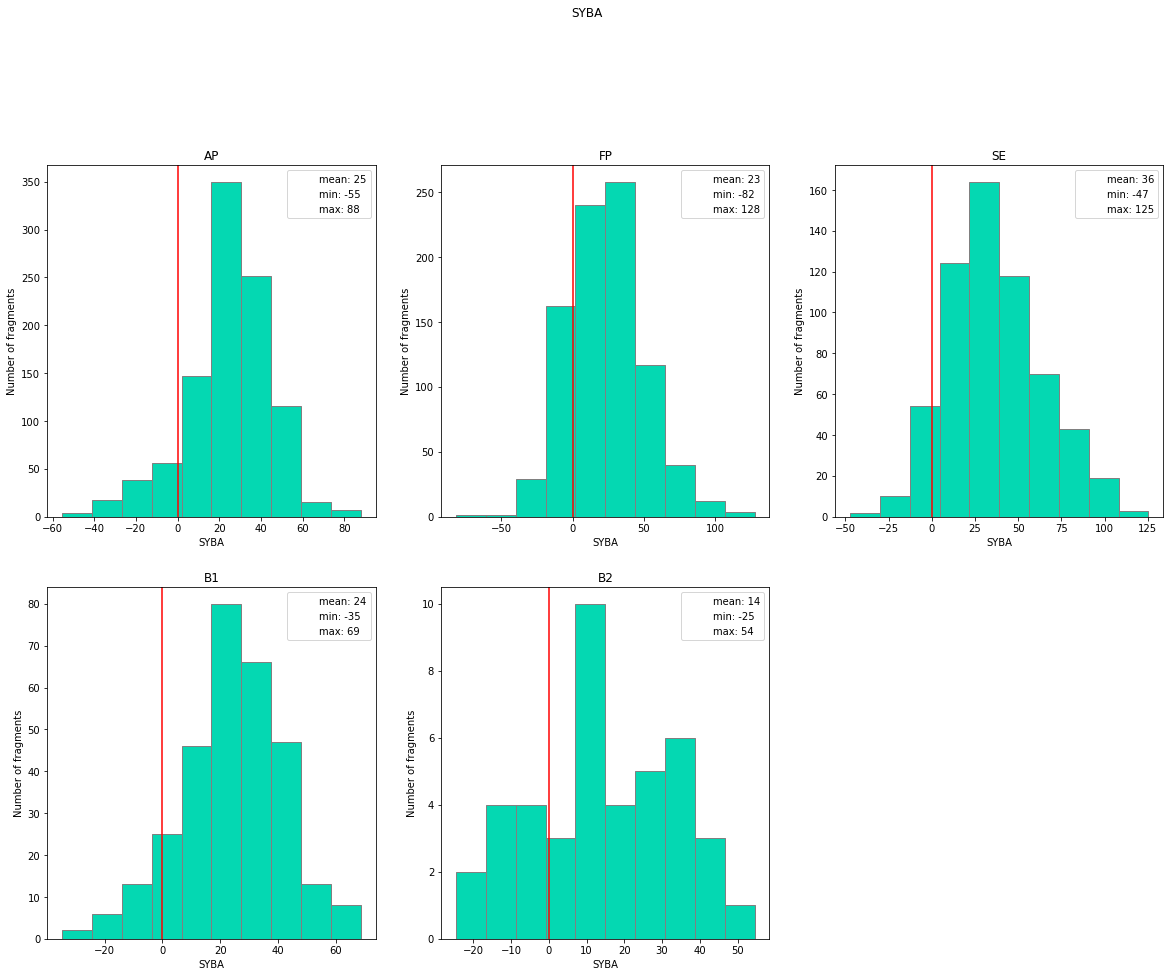

Apply pairwise retrosynthesizability filter..(ToDo)


In [17]:
pipeline_dict = filters.pipeline.start_pipeline(fragment_library, pains_parameters, brenk_parameters, ro3_parameters, qed_parameters, bb_parameters, syba_parameters, retro_parameters, general_parameters)

In [18]:
pipeline_dict.keys()

dict_keys(['fragment_library', 'pains_df', 'brenk_df'])